<a href="https://colab.research.google.com/github/Webdev4better/FutureMakers2022/blob/main/Day_16_Natural_Language_Processing_KL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

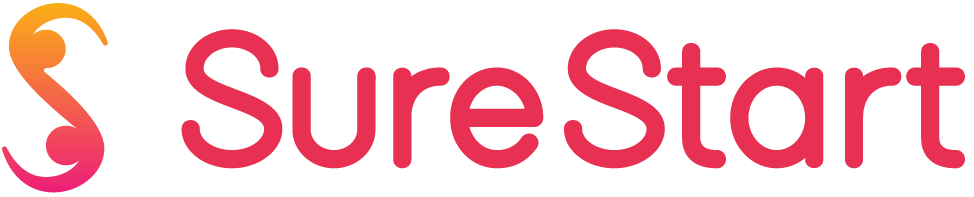

#Day 16 Objectives:
* Introduction to Natural Language Processing (NLP) to understand how machines make sense of human language. 


# Natural Language Processing [NLP]

Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

## Question 1

Give 5 examples of NLP applications in day to day life. You can search and read more about NLP and the way it impacts our daily life [here](https://research.aimultiple.com/nlp-use-cases/).

< *
Chatbots - Customer service
Sentiment analysis - Positive or negative feedback
Speech recognition - decode the human voice, used in alexa and siri
Machine translation - similar to google translate




# Foundations 


## Tokenization 

Given a character sequence and a defined document (collection of sentences), tokenization is the task of chopping the sentences into pieces (words), called tokens, perhaps at the same time throwing away certain characters, such as punctuation. 

E.g.,

"Friends, Romans, Countrymen, lend me your ears" can be tokenized into
$$['Friends', 'Romans', 'Countrymen', 'lend', 'me', 'your', 'ears']$$

## Question 2

Tokenize the following strings

1. How are you doing today?
2. The teenagers, students from Mrs. Smith's art class, went on a field trip to the museum.
3. The teenagers — students from Mrs. Smith's art class — went on a field trip to the museum.
4. I have lived in Des Moines, Iowa; Seattle, Washington; and Boise, Idaho.
5. For his birthday, Mark received a sweater, a jacket, a savings bond — and a new bike!
6. I have three brothers: David, Kent and Jacob.

### Answer 2

In [61]:
strings = ["How are you doing today?",
"The teenagers, students from Mrs. Smith\'s art class, went on a field trip to the museum.",
"The teenagers — students from Mrs. Smith's art class — went on a field trip to the museum.",
"I have lived in Des Moines, Iowa; Seattle, Washington; and Boise, Idaho.",
"For his birthday, Mark received a sweater, a jacket, a savings bond — and a new bike!",
"I have three brothers: David, Kent and Jacob."]
finish_str = []
for i in strings:
  finish_str.append(i.replace("?","").replace(".","").replace("!","").replace(",","").replace("-","").replace(":","").replace(";","").replace("'","").replace("—","").split(" "))
  print(i.replace("?","").replace(".","").replace("!","").replace(",","").replace("-","").replace(":","").replace(";","").replace("'","").replace("—","").split(" "))
  print()

['How', 'are', 'you', 'doing', 'today']

['The', 'teenagers', 'students', 'from', 'Mrs', 'Smiths', 'art', 'class', 'went', 'on', 'a', 'field', 'trip', 'to', 'the', 'museum']

['The', 'teenagers', '', 'students', 'from', 'Mrs', 'Smiths', 'art', 'class', '', 'went', 'on', 'a', 'field', 'trip', 'to', 'the', 'museum']

['I', 'have', 'lived', 'in', 'Des', 'Moines', 'Iowa', 'Seattle', 'Washington', 'and', 'Boise', 'Idaho']

['For', 'his', 'birthday', 'Mark', 'received', 'a', 'sweater', 'a', 'jacket', 'a', 'savings', 'bond', '', 'and', 'a', 'new', 'bike']

['I', 'have', 'three', 'brothers', 'David', 'Kent', 'and', 'Jacob']



## Bag of Words

In this model, a text is represented as the bag of its words, disregarding grammar and even word order but keeping multiplicity.

In bag of words, we treat each unique word as a "feature". For a sentence, the vector values correspond to the frequency of a word. 

E.g., They slither while they pass, they slip away across the universe

$$\begin{array}
tthey & slither & while & from & pass & slip & away & a & across & the & universe \\  
3    & 1       & 1                          & 0    & 1    & 1    & 1                         & 0 & 1      & 1   & 1       
\end{array}$$

Note that the "features" represent entire vocabulary of a document (collection of sentences), not just of a sentence.

## Question 3

Let's take an excerpt from **A Tale of Two Cities**

*it was the best of times\
it was the worst of times\
it was the age of wisdom\
it was the age of foolishness*

Design a Bag of Words model which takes as input the above 4 lines, and outputs vectors in the following form

$$\begin{array}
iit & was & the & best & of & times & worst & age & wisdom & foolishness \\  
4  & 4  & 4   & 1  & 4  & 2   & 1  & 1 & 2  & 1    
\end{array}$$

### Answer 3

In [62]:
import tensorflow as tf
v = ["it was the best of times",
"it was the worst of times",
"it was the age of wisdom","it was the age of foolishness"]
dict1 = {}
for i in v:
  for j in i.split(" "):
    if (not (j in dict1.keys())):
      dict1[j] = 1
    else:
      dict1[j]+=1
print(dict1)

{'it': 4, 'was': 4, 'the': 4, 'best': 1, 'of': 4, 'times': 2, 'worst': 1, 'age': 2, 'wisdom': 1, 'foolishness': 1}


## Question 4

Now represent each sentence as an encoded vector. The features are $['it', 'was', 'the', 'best', 'of', 'times', 'worst', 'age', 'wisdom', 'foolishness']$

E.g,\
*it was the best of times* $\rightarrow [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]$ \
*it was the worst of times* $\rightarrow [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]$\
*it was the age of wisdom* $ \rightarrow [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]$\
*it was the age of foolishness*  $ \rightarrow [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]$

### Answer 4

In [63]:
list1 = []
list2 = ['it','was','the','best','of','times','worst','age','wisdom','foolishness']

dict1 = {}
for k in list2:
  dict1[k] = 0
for i in v:
  for j in i.split(" "):
    if (not (j in dict1.keys())):
      dict1[j] = 1
    else:
      dict1[j]+=1
  list1.append(list(dict1.values()))
  dict1 = {}
  for k in list2:
    dict1[k] = 0
print(list1)

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 1, 1, 0], [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]]


While Bag of Word model has been used with great success on prediction problems like language modeling and documentation classification, it has some flagrant shortcomings like

* **Vocabulary**: The vocabulary requires careful design, most specifically in order to manage the size, which impacts the sparsity of the document representations.
* **Sparsity**: Sparse representations are harder to model both for computational reasons (space and time complexity) and also for information reasons, where the challenge is for the models to harness so little information in such a large representational space.
* **Meaning**: Discarding word order ignores the context, and in turn meaning of words in the document (semantics). Context and meaning can offer a lot to the model, that if modeled could tell the difference between the same words differently arranged (“this is interesting” vs “is this interesting”), synonyms (“old bike” vs “used bike”), and much more.

## Stop Words Removal

This is the process to get rid of common language articles, pronouns and prepositions such as “and”, “the” or “to” in English. In this process some very common words that appear to provide little or no value to the NLP objective are filtered and excluded from the text to be processed, hence removing widespread and frequent terms that are not informative about the corresponding text.

## Question 5

Take this paragraph

*A well-organized paragraph supports or develops a single controlling idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs the order of the sentences; and it advises the reader of the subject to be discussed and how the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph. In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the current paragraph to the previous one, or one providing background information.*

And return a paragraph with all the stop words removed from it. You can design your own stopwords list.

### Answer 5

In [64]:
stopwords = ['as','to','the','a']
string = "A well-organized paragraph supports or develops a single controlling idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs the order of the sentences; and it advises the reader of the subject to be discussed and how the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph. In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the current paragraph to the previous one, or one providing background information."
string = string.lower()
string2 = ""
for i in string.split(" "):
  if i not in stopwords:
    string2+= i + " "
print(string2)

well-organized paragraph supports or develops single controlling idea, which is expressed in sentence called topic sentence. topic sentence has several important functions: it substantiates or supports an essay’s thesis statement; it unifies content of paragraph and directs order of sentences; and it advises reader of subject be discussed and how paragraph will discuss it. readers generally look first few sentences in paragraph determine subject and perspective of paragraph. that’s why it’s often best put topic sentence at very beginning of paragraph. in some cases, however, it’s more effective place another sentence before topic sentence—for example, sentence linking current paragraph previous one, or one providing background information. 


## Stemming

Affixes that are attached at the beginning of the word are called prefixes (e.g. “astro” in the word “astrobiology”) and the ones attached at the end of the word are called suffixes (e.g. “ful” in the word “helpful”).

Stemming refers to the process of slicing the end or the beginning of words with the intention of removing affixes (lexical additions to the root of the word).

We can use nltk library to stem the words in following manner

In [70]:
from nltk.stem import PorterStemmer
from nltk.stem import ARLSTem
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
  
ps1 = LancasterStemmer()
ps2 = PorterStemmer() 
ps3 = ARLSTem()
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps1.stem(w))
    print(w, " : ", ps2.stem(w))
    print(w, " : ", ps3.stem(w))

program  :  program
program  :  program
program  :  program
programs  :  program
programs  :  program
programs  :  programs
programmer  :  program
programmer  :  programm
programmer  :  programmer
programming  :  program
programming  :  program
programming  :  programming
programmers  :  program
programmers  :  programm
programmers  :  programmers


## Question 6

Use a different Stemmer like Lancaster or ARLstem and find out how they differ from the one given in the above example (Porter).

### Answer 6

< *Lancaster appears to use only one stem, whereas ARLstem generalizes less easily, using the entire word as a stem.* >

## Lemmetization

Lemmatization resolves words to their dictionary form (known as lemma) for which it requires detailed dictionaries in which the algorithm can look into and link words to their corresponding lemmas.


For example, the words “running”, “runs” and “ran” are all forms of the word “run”, so “run” is the lemma of all the previous words.

In [79]:
# from nltk.stem import WordNetLemmatizer
import nltk
# from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Question 7

Refer to the nltk documentation and figure out other lemmatizers and write how they differ from each other.

### Answer 7

< *Wordnet seems to be the most popular one* >

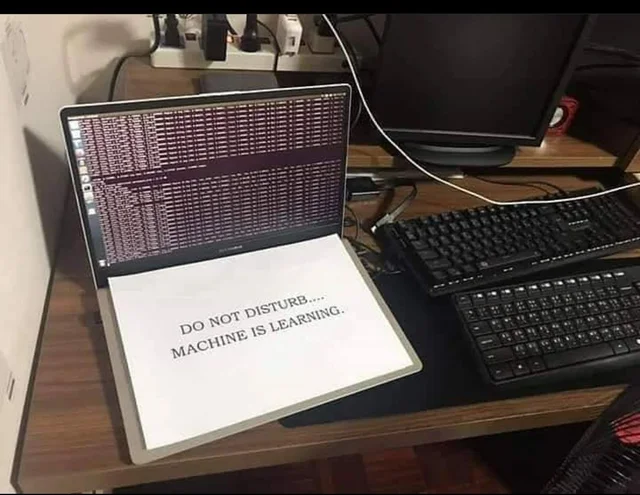

# Text Generation

Now we will learn how to generate text using a character-based RNN. You will work with a dataset of Shakespeare's writing from Andrej Karpathy's [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Given a sequence of characters from this data ("Shakespear"), train a model to predict the next character in the sequence ("e"). Longer sequences of text can be generated by calling the model repeatedly.

In [81]:
import tensorflow as tf
import numpy as np
import os
import time

## Dataset

In [82]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1130496/1115394 [==============================] - 0s 0us/step


In [83]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [84]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [85]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


## Vectorization

Before training, you need to convert the strings to a numerical representation.

The `tf.keras.layers.StringLookup` layer can convert each character into a numeric ID. It just needs the text to be split into tokens first.

In [86]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [87]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [88]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [90]:
tf.strings.reduce_join(chars, axis=-1).numpy()

def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

# Task

Given a character, or a sequence of characters, what is the most probable next character? This is the task you're training the model to perform. The input to the model will be a sequence of characters, and you train the model to predict the output—the following character at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?

Next divide the text into example sequences. Each input sequence will contain `seq_length` characters from the text.

For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.

So break the text into chunks of `seq_length+1`. For example, say `seq_length` is 4 and our text is "Hello". The input sequence would be "Hell", and the target sequence "ello".

To do this first use the `tf.data.Dataset.from_tensor_slices` function to convert the text vector into a stream of character indices.

In [91]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [ ]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

For training you'll need a dataset of `(input, label)` pairs. Where `input` and `label` are sequences. At each time step the input is the current character and the label is the next character.

Here's a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep:

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

split_input_target(list("Tensorflow"))

In [ ]:
dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

You used `tf.data` to split the text into manageable sequences. But before feeding this data into the model, you need to shuffle the data and pack it into batches.

In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

# Model

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units, return_sequences=True, return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

For each character the model looks up the embedding, runs the GRU one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-likelihood of the next character:

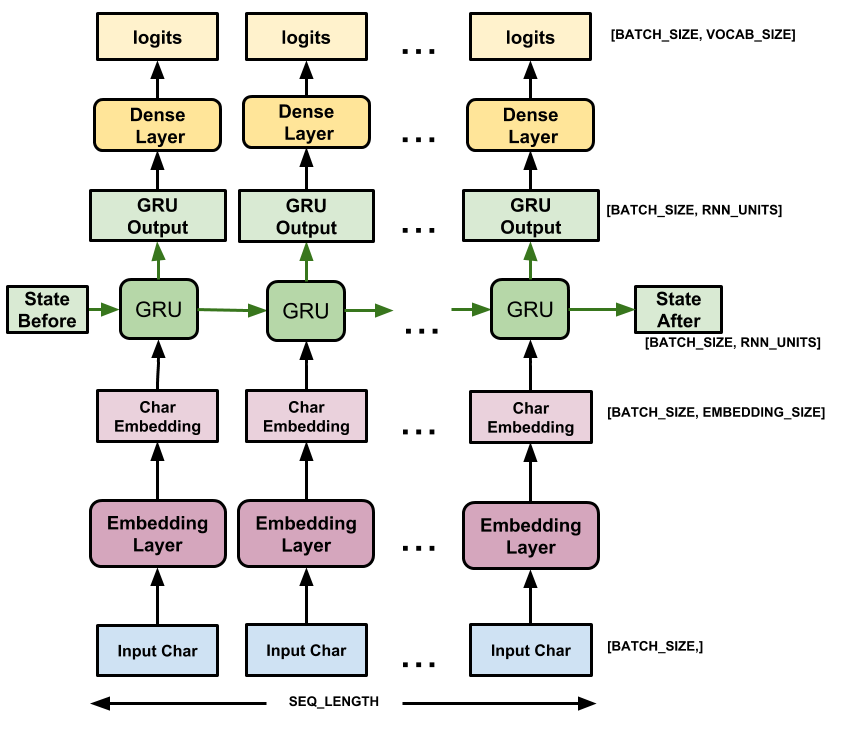

## Question 8

We have created a model class as opposed to a model sequential function as in previous exercises. Can you tell us why we have done so? Can you convert the model class into a sequential model function? Are there any obstacles in sequentializing the GRU model? 

< *The purpose of creating a model class is to create a pipeline for ML, as the information is flowed through a conveyor belt system that gets refined over time.

A challenge to the GRU model is that it takes up a lot of computational resources* >

# Train

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

model.compile(optimizer='adam', loss=loss)

In [ ]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS, verbose=1)

# Generate

The simplest way to generate text with this model is to run it in a loop, and keep track of the model's internal state as you execute it.

Each time you call the model you pass in some text and an internal state. The model returns a prediction for the next character and its new state. Pass the prediction and state back in to continue generating text.

The following makes a single step prediction:

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

Run it in a loop to generate some text. Looking at the generated text, you'll see the model knows when to capitalize, make paragraphs and imitates a Shakespeare-like writing vocabulary. With the small number of training epochs, it has not yet learned to form coherent sentences.

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

The easiest thing you can do to improve the results is to train it for longer (try EPOCHS = 30).

You can also experiment with a different start string, try adding another RNN layer to improve the model's accuracy, or adjust the temperature parameter to generate more or less random predictions.

If you want the model to generate text faster the easiest thing you can do is batch the text generation. In the example below the model generates 5 outputs in about the same time it took to generate 1 above.

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

# **Upload this Day 16 Colab Notebook to your Github repository under "Day 16" folder. Also add your *Reflection* on today's learning in README.md**

# Bonus Question - RNN

We have used GRU layer in MyModel, try out RNN or LSTM layer in place of GRU and compare the model performance.

# Bonus Question - Story

Now that you know how to generate text, how about teaching the model on how to learn fictional stories to create your own story? Code an LSTM on some fictional text dataset, train the model, and produce your fictional story.

Source: 

https://www.tensorflow.org/text/tutorials/text_generation